<a href="https://colab.research.google.com/github/hyo04/ML-Coursework-2/blob/main/06_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

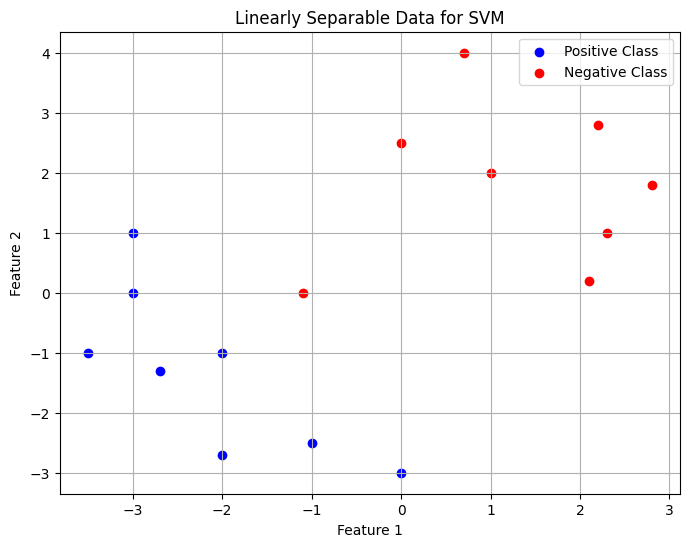

In [1]:
# Create linearly separable data

import numpy as np
import matplotlib.pyplot as plt

# Generate positive class samples
X_positive = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                       [-1, -2.5], [0, -3]])
y_positive = np.ones(len(X_positive))

# Generate negative class samples
X_negative = np.array([[-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                       [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y_negative = -np.ones(len(X_negative))

# Concatenate positive and negative samples
X = np.vstack((X_positive, X_negative))
y = np.concatenate((y_positive, y_negative))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Positive Class', color='blue')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', label='Negative Class', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data for SVM')
plt.legend()
plt.grid()
plt.show()

In [7]:
import cvxpy as cp

def hard_margin(X, y):
    m, n = X.shape

    # Define the SVM optimization problem
    W = cp.Variable(n, value=np.zeros(n))  # Weights
    b = cp.Variable(value=0)               # Bias
    objective = cp.Minimize(0.5 * cp.square(cp.norm(W)))
    constraints = [y[i] * (X[i] @ W + b)  >= 1 for i in range(m)]  # Margin constraints

    # Formulate and solve the SVM problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Check if the problem was solved successfully
    if prob.status != cp.OPTIMAL:
        print("SVM optimization failed. Please check the data and constraints.")
        return

    # Get the optimal values of W and b
    W_optimal = W.value
    b_optimal = b.value
    print("Optimal value of W:", W_optimal)
    print("Optimal value of b:", b_optimal)

    # Calculate the slope and intercept of the decision boundary
    slope = -W_optimal[0] / W_optimal[1]
    intercept = -b_optimal / W_optimal[1]

    # Calculate the support vectors
    alphas = np.array([constraints[i].dual_value for i in range(m)])  # Extract alphas corresponding to support vectors
    non_zero_alphas = alphas[np.where(alphas > 1e-4)] # Due to approximations you may get too small values for alpha instead of zero. We will consider values below 1e-4 as zero for alpha.
    support_vectors = X[np.where(alphas > 1e-4)]  # Choose support vectors with non-zero dual values
    #print(alphas)
    print("Non_zero aplhas:", non_zero_alphas)
    print("Support Vectors:\n", support_vectors)


    # Plot the data points and decision boundary
    #plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x_vals = np.array([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, label='Decision Boundary', color='black')

    # Plot the support vectors
    margin = 1 / W_optimal[1]
    y_down = y_vals - margin
    y_up = y_vals + margin
    plt.plot(x_vals, y_down, linestyle='dotted', color='grey')
    plt.plot(x_vals, y_up, linestyle='dotted', color='grey')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='r', label='Support Vectors')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Hard Margin SVM Decision Boundary')
    plt.grid()
    plt.savefig("hard_margin_svm_plot.png", dpi=300, bbox_inches="tight")
    plt.show()

Optimal value of W: [-1.73913043 -1.30434783]
Optimal value of b: -2.913043478293933
Non_zero aplhas: [1.44612493 0.91682403 2.36294896]
Support Vectors:
 [[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]


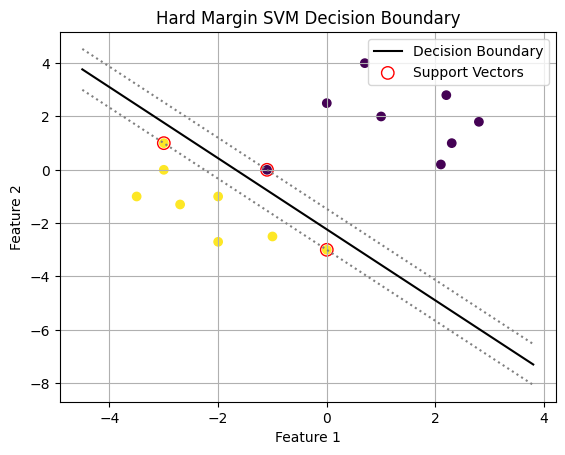

In [11]:
hard_margin(X, y)

## Task 1 [10 marks]

In this task, you will compare the outcomes calculated in **Exam Paper 2022 - Question 1** with the results obtained from the provided hard-margin SVM function when applied to the same dataset.


1. **Review Exam Paper 2022 - Question 1:**
   Begin by revisiting the results obtained in **Exam Paper 2022 - Question 1**. Remind yourself of the Lagrange multipliers ($\boldsymbol{\alpha}$)  calculated and the support vectors that were identified using manual calculations.

2. **Utilise the Provided Code:**
   Next, employ the provided hard-margin SVM function to train an SVM classifier on the same dataset. The function will automatically determine the optimal parameters and pinpoint the support vectors.

3. **Generate a Visualisation:**
   Create a plot that displays the dataset's data points, the decision boundary, margins, and the support vectors. This visual representation will help you comprehend how the SVM separates the classes.

4. **Compare and Analyze:**
   Compare the ($\boldsymbol{\alpha}$) values calculated in **Exam Paper 2022 - Question 1** with the dual values obtained using the SVM function. Additionally, pay attention to the support vectors identified through both manual calculations and the `hard_margin` function. Reflect on the similarities (and differences if any) you observe between the two sets of results.

5. **Document Your Observations:**
   Summarise your findings and reflections concerning the discrepancies and agreements between your manual calculations and the SVM function's outcomes. Discuss any insights you've gained into the SVM's decision-making process and the alignment of your manual work with the code approach.

6. **Include the Plot:**
   Embed the generated plot in your documentation that show the data along with the decision boundary, margins, and support vectors.




Optimal value of W: [-2.67874166e-05 -5.00000001e-01]
Optimal value of b: -2.678732450621305e-05
Non_zero aplhas: [0.12498982 0.125     ]
Support Vectors:
 [[-1  2]
 [-1 -2]]


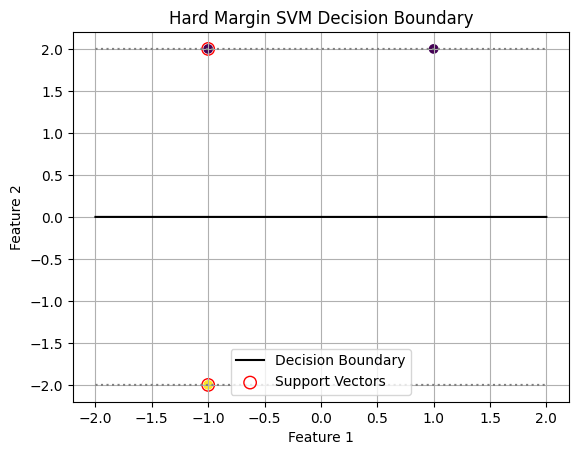

In [10]:
# Task 1

# Dataset from the 2022 exam
X_exam = np.array([
    [1, 2],    #x1
    [-1, 2],   #x2
    [-1, -2]   #x3
])

y_exam = np.array([
    -1,
    -1,
     1
])

# Training an SVM classifier on the exam dataset
hard_margin(X_exam,y_exam)

The results produced by the hard-margin SVM function match the analytical solution from Exam Paper 2022 almost exactly. The dual values returned by the function agree with the manually computed Lagrange multipliers:
α1 = 0, α2 = 1/8, and α3 = 1/8.

Any small numerical differences are just floating-point rounding. Since both the manual derivation and the SVM function arrive at the same values, it confirms that the solver is correctly implementing the dual formulation and the KKT optimality conditions.

A similar match appears for the support vectors.The exam solution shows that only 𝑥2 and 𝑥3 have non-zero α-values, which means they lie on the margin. The hard_margin SVM function identifies the same two points, and in the plot these are marked with a red outline on the dashed margin lines. Both approaches therefore agree on which samples define the decision boundary.

The parameters 𝑤 and 𝑏 also align with the exam's solution. Both the analytical and numerical methods produce a weight vector approximately equal to 𝑤 ≈[0,−0.5],with a bias very close to zero. This results in a horizontal decision boundary, which is what appears in the generated plot. The margin lines pass through the correct support vectors, matching the geometry expected from the dual formulation.

Overall, the computational results and the manual derivation are in complete agreement. Working through both versions helps show clearly how the SVM uses only the points with non-zero α-values to determine the separating hyperplane. The remaining samples have no influence on 𝑤 or 𝑏, which verifies the connection between the theoretical aspects used(dual formulation, KKT conditions) and the visual intuition provided by the plot.

<img src="/content/hard_margin_svm_plot.png" width="600">


## Task 2 [60 marks]

In this task, you will modify the provided hard-margin SVM code to implement a soft-margin SVM. Additionally, you will explore the impact of different values of the regularization parameter `C` on the results.

1. **Load the Dataset:**
   Use the same dataset form the first code cell.

2. **Modify the Code:** Take the hard-margin SVM code provided and modify it to implement a soft-margin SVM. The new function can be named `soft_margin` and will accept `(X,y,C)` as inputs to the function.

3. **Parameter Exploration:** Use a range of `C` values: `[1e-3, 1e-1, 1, 1e2, 1e5]`. For each value of `C`, train the soft-margin SVM on the same dataset and observe the results.

4. **Observations and Analysis:** For each value of `C`, compare and analyze the following aspects:
   - The decision boundary and the positions of the support vectors.
   - The number of support vectors.
   - The impact on the margin width.

5. **Documentation:** Create a summary report that includes the modified code, the results obtained for each `C` value (optimal $\mathbf{W}$ and $\mathbf{b}$ values and a plot that shows data along with margins and support vectors ), and your observations and analysis. Discuss how changing the value of `C` affects the trade-off between achieving a wider margin and allowing some misclassifications.

6. **Conclusion:** Based on your observations and analysis, conclude which values of `C` appear to work best for the given dataset and explain your reasoning.


In [22]:
# Task 2

def soft_margin(X, y, C):
    m, n = X.shape

    # Define variables
    W = cp.Variable(n, value=np.zeros(n))   # Weights
    b = cp.Variable(value=0.0)              # Bias
    xi = cp.Variable(m)                     # Slack variables

    # Objective function
    objective = cp.Minimize(0.5 * cp.square(cp.norm(W)) + C * cp.sum(xi))

    # Soft-margin constraints
    constraints = [y[i] * (X[i] @ W + b) >= 1 - xi[i] for i in range(m)] + [xi[i] >= 0 for i in range(m)]

    # Formulate and solve the SVM problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Optimal parameters
    W_optimal = W.value
    b_optimal = b.value
    print("Optimal value of W:", W_optimal)
    print("Optimal value of b:", b_optimal)

    # Extract dual values
    alphas = np.array([constraints[i].dual_value for i in range(m)])
    non_zero_alphas = alphas[alphas > 1e-4]
    support_vectors = X[alphas > 1e-4]

    print("Non-zero alphas:", non_zero_alphas)
    print("Support Vectors:\n", support_vectors)
    print("Number of support vectors:", len(support_vectors))


    # Decision boundary
    slope = -W_optimal[0] / W_optimal[1]
    intercept = -b_optimal / W_optimal[1]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    x_vals = np.array([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, label='Decision Boundary')

    # Margins for soft-margin SVM
    margin = 1 / np.linalg.norm(W_optimal)
    plt.plot(x_vals, y_vals + margin, linestyle='dotted', color='grey')
    plt.plot(x_vals, y_vals - margin, linestyle='dotted', color='grey')

    # Support vectors
    plt.scatter(
        support_vectors[:, 0], support_vectors[:, 1],
        s=80, facecolors='none', edgecolors='r',
        label='Support Vectors'
    )

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'Soft Margin SVM (C = {C})')
    plt.grid()
    plt.savefig(f"soft_margin_svm_plot_C{C}.png", dpi=300, bbox_inches="tight")
    plt.show()


Soft-margin SVM for C = 0.001
Optimal value of W: [-0.0272 -0.0248]
Optimal value of b: -0.009754965144820393
Non-zero alphas: [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001]
Support Vectors:
 [[-3.5 -1. ]
 [-3.   0. ]
 [-3.   1. ]
 [-2.7 -1.3]
 [-2.  -1. ]
 [-2.  -2.7]
 [-1.  -2.5]
 [ 0.  -3. ]
 [-1.1  0. ]
 [ 0.   2.5]
 [ 1.   2. ]
 [ 0.7  4. ]
 [ 2.1  0.2]
 [ 2.3  1. ]
 [ 2.8  1.8]
 [ 2.2  2.8]]
Number of support vectors: 16


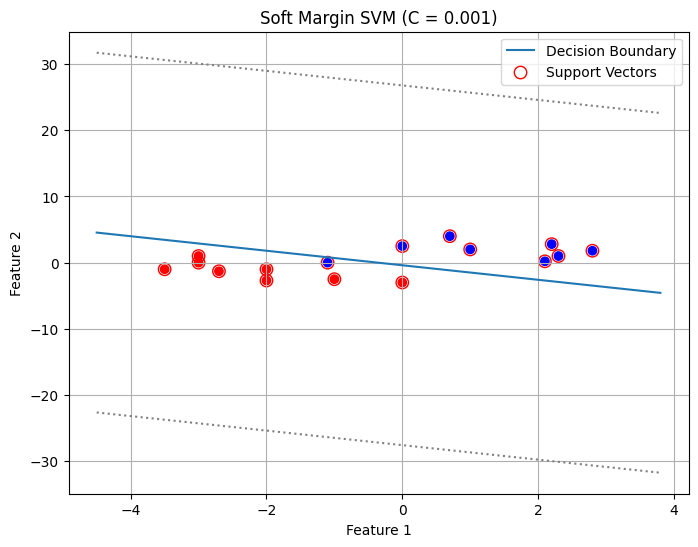



Soft-margin SVM for C = 0.1
Optimal value of W: [-0.38493724 -0.35146444]
Optimal value of b: -0.12133890200434215
Non-zero alphas: [0.1        0.02020342 0.1        0.1        0.04661153 0.07359189]
Support Vectors:
 [[-3.   1. ]
 [-2.  -1. ]
 [ 0.  -3. ]
 [-1.1  0. ]
 [ 0.   2.5]
 [ 2.1  0.2]]
Number of support vectors: 6


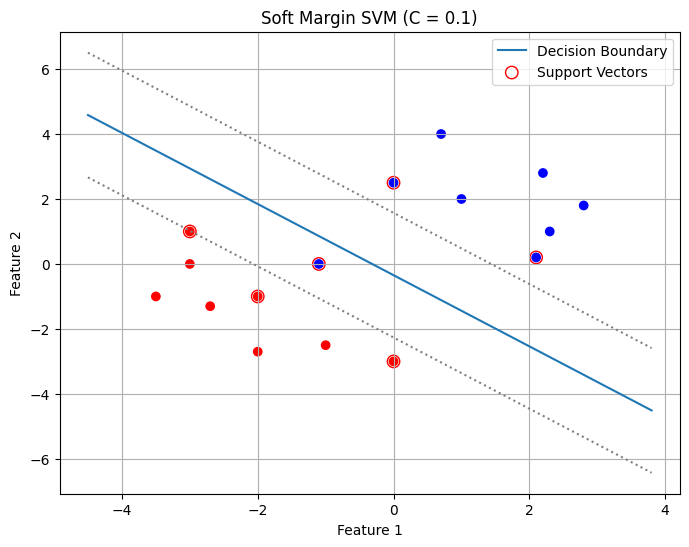



Soft-margin SVM for C = 1
Optimal value of W: [-0.736 -0.552]
Optimal value of b: -0.6560000019791202
Non-zero alphas: [0.61199863 0.38800137 1.        ]
Support Vectors:
 [[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]
Number of support vectors: 3


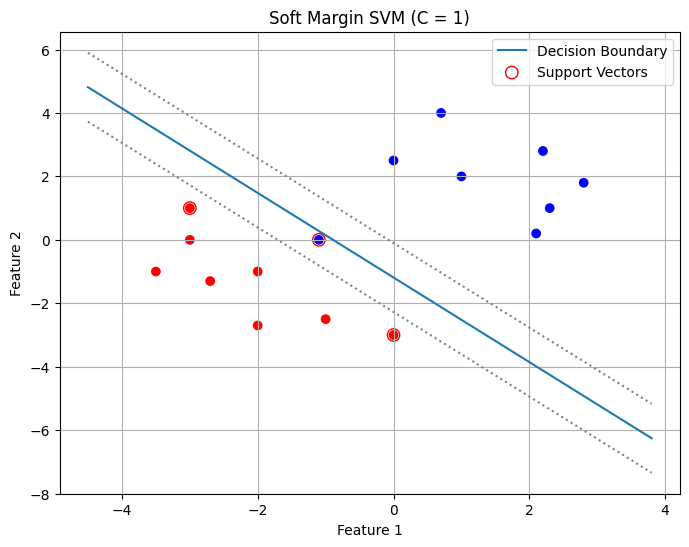



Soft-margin SVM for C = 100.0
Optimal value of W: [-1.73913043 -1.30434783]
Optimal value of b: -2.9130434783253847
Non-zero alphas: [1.4461246  0.91682436 2.36294896]
Support Vectors:
 [[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]
Number of support vectors: 3


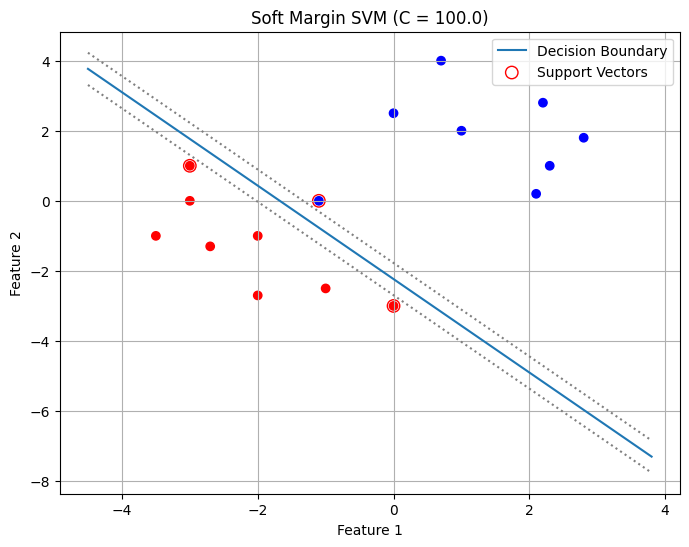



Soft-margin SVM for C = 100000.0
Optimal value of W: [-1.73913044 -1.30434783]
Optimal value of b: -2.913043478587508
Non-zero alphas: [1.44612467 0.91682429 2.36294896]
Support Vectors:
 [[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]
Number of support vectors: 3


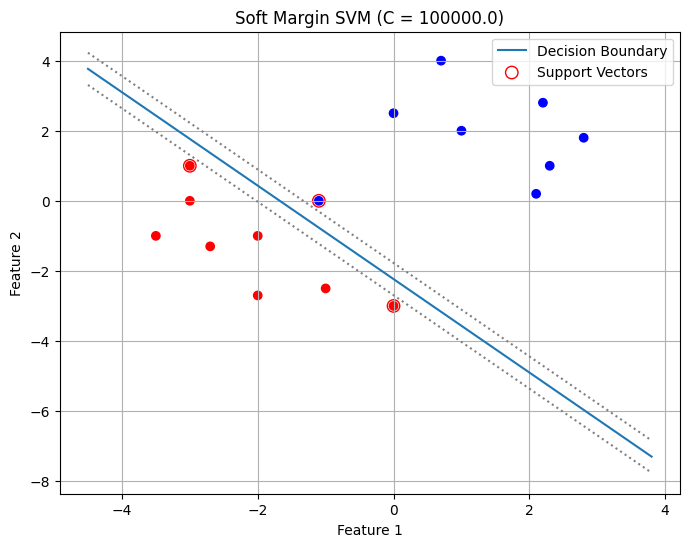

In [25]:
# Task 2

# Parameter exploration
C_vals = [1e-3, 1e-1, 1, 1e2, 1e5]
results = {}

for C in C_vals:
    print(f"Soft-margin SVM for C = {C}")
    output = soft_margin(X, y, C)
    results[C] = output
    print("\n")

The parameter C controls the trade-off between having a wide margin and penalising misclassifications. A small value of C makes the SVM more tolerant of errors with a wider margin, while a large value makes the classifier stricter and forces it to classify all points correctly with a more narrow margin.

**C = 0.001:**
  * The model allows many margin violations.
  * Almost every point is a support vector (16 support vectors).
  * The margin is extremely wide.
  * The decision boundary is loose and not very accurate.
  * Misclassifications are permitted because the penalty for errors is very small.

**C = 0.1:**
  * The margin is still wide, but violations are penalised more strongly.
  * The number of support vectors drops to 6.
  * The model separates the classes better than with C = 0.001.

**C = 1:**
  * This value produces a more balanced classifier.
  * Only 3 support vectors remain.
  * The margin becomes narrower and more meaningful.The classifier correctly separates most points without overfitting.

**C = 100 and C = 100000:**
  * Both values give almost identical results.
  * Only 3 support vectors are used, the minimum needed.
  * The margin is very narrow.
  * The SVM behaves almost exactly like a hard-margin SVM (more as the value of C increases).

## Task 3 [30 marks]



In this task, you will implement both the soft-margin and hard-margin Support Vector Machine (SVM) representations using the scikit-learn library for the same dataset. You will document your code, generate plots to visualise the decision boundaries, margins, and support vectors, and extract the optimal values of ($\mathbf{W}$) and $\mathbf{b}$.


1. **Load the Dataset:**
   Use the same dataset form the first code cell.

2. **Implement Soft-Margin SVM:**
   Using the scikit-learn library, implement the soft-margin SVM. Utilise a loop to train SVM classifiers with varying values as in Task 2. For each \( C \) value, document the optimal ($\mathbf{W}$) and $\mathbf{b}$ values obtained from the SVM model.

3. **Visualise Soft-Margin SVM:**
   Generate plots for each \( C \) value to visualise the dataset, decision boundary, margins, and support vectors. These plots will help you comprehend the impact of different \( C \) values on the SVM representation.

4. **Implement Hard-Margin SVM:**
   Repeat the process for the hard-margin SVM. Train SVM classifiers using the scikit-learn library. Document the optimal \($\mathbf{W}$) and $\mathbf{b}$ value for each case.

5. **Visualise Hard-Margin SVM:**
   Create plot similar to the soft-margin SVM case to visualise the hard-margin SVM result.

6. **Documentation:**
   Document your code, including how you loaded the data, implemented the SVM classifiers, and extracted the optimal parameters. Embed the generated plots in your documentation.

7. **Summarise Observations:**
   Summarise your observations on the differences between soft-margin and hard-margin SVM implementation form scikitlearn perspective.

.


Soft-Margin SVM with C = 0.001
Optimal W: [-0.0272 -0.0248]
Optimal b: 0.003959999680519022
Support Vectors:
 [[-1.1  0. ]
 [ 0.   2.5]
 [ 1.   2. ]
 [ 0.7  4. ]
 [ 2.1  0.2]
 [ 2.3  1. ]
 [ 2.8  1.8]
 [ 2.2  2.8]
 [-3.5 -1. ]
 [-3.   0. ]
 [-3.   1. ]
 [-2.7 -1.3]
 [-2.  -1. ]
 [-2.  -2.7]
 [-1.  -2.5]
 [ 0.  -3. ]]
Number of support vectors: 16


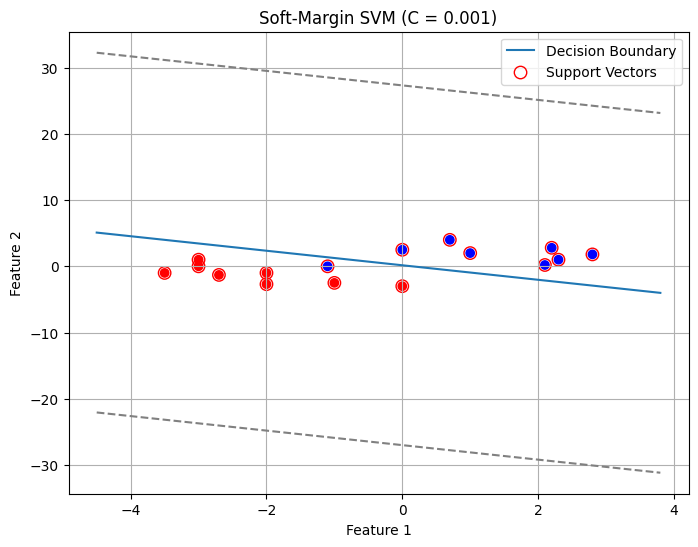



Soft-Margin SVM with C = 0.1
Optimal W: [-0.3847726  -0.35131411]
Optimal b: -0.1214295895208465
Support Vectors:
 [[-1.1  0. ]
 [ 0.   2.5]
 [ 2.1  0.2]
 [-3.   1. ]
 [-2.  -1. ]
 [ 0.  -3. ]]
Number of support vectors: 6


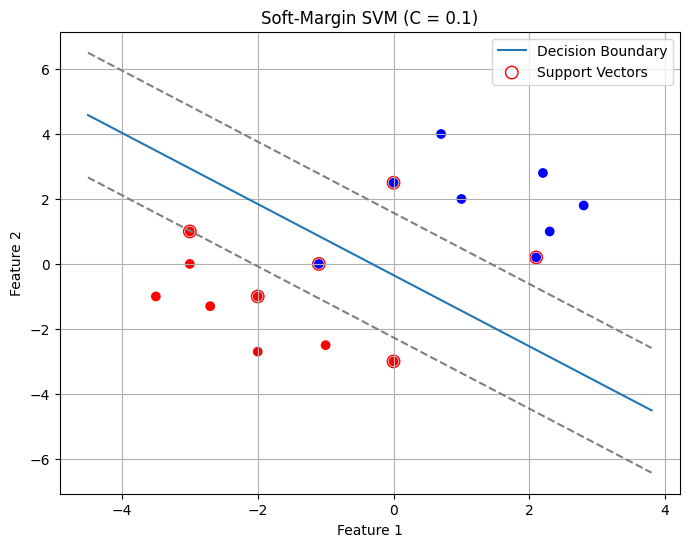



Soft-Margin SVM with C = 1
Optimal W: [-0.73599999 -0.55200001]
Optimal b: -0.6560000228881836
Support Vectors:
 [[-1.1  0. ]
 [-3.   1. ]
 [ 0.  -3. ]]
Number of support vectors: 3


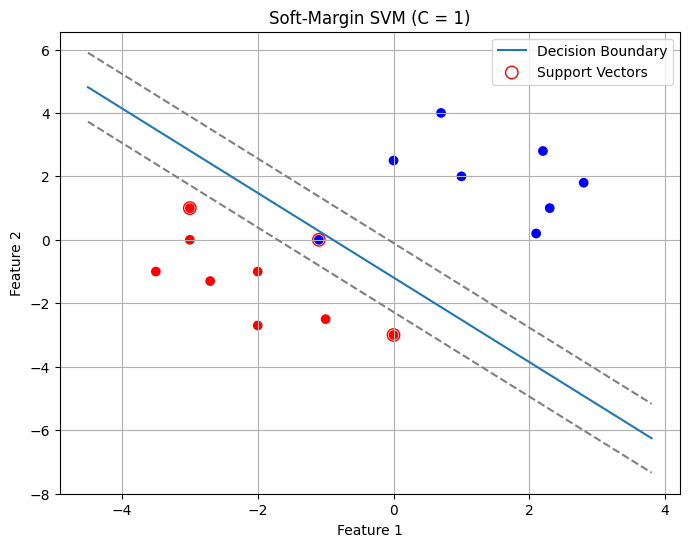



Soft-Margin SVM with C = 100.0
Optimal W: [-1.73838548 -1.30378914]
Optimal b: -2.9116528947672458
Support Vectors:
 [[-1.1  0. ]
 [-3.   1. ]
 [ 0.  -3. ]]
Number of support vectors: 3


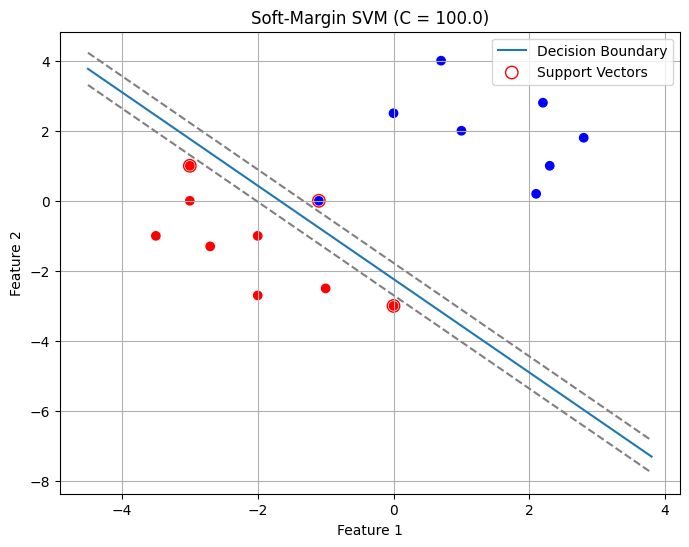



Soft-Margin SVM with C = 100000.0
Optimal W: [-1.73838548 -1.30378914]
Optimal b: -2.9116528947672458
Support Vectors:
 [[-1.1  0. ]
 [-3.   1. ]
 [ 0.  -3. ]]
Number of support vectors: 3


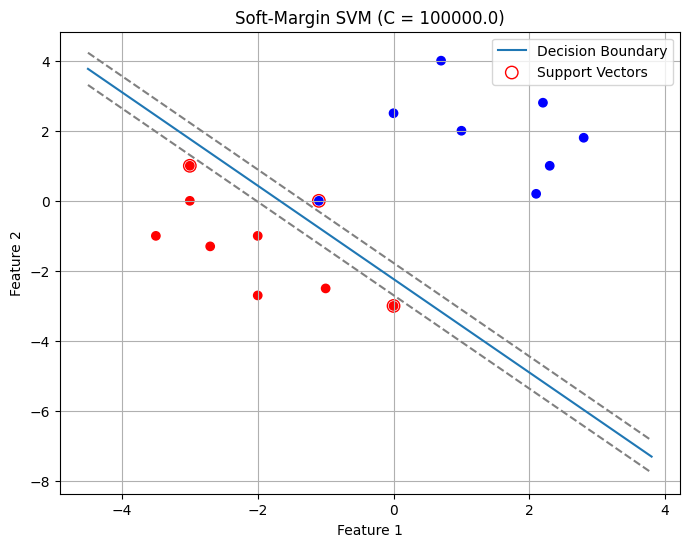

In [32]:
# Task 3 (soft margin)
from sklearn.svm import SVC

# Load the dataset from the first cell

# Generate positive class samples
X_positive = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                       [-1, -2.5], [0, -3]])
y_positive = np.ones(len(X_positive))

# Generate negative class samples
X_negative = np.array([[-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                       [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y_negative = -np.ones(len(X_negative))

# Concatenate positive and negative samples
X = np.vstack((X_positive, X_negative))
y = np.concatenate((y_positive, y_negative))

# ---------------------------------------------------------------------------------------------------------

# Same C values as Task 2
C_values = [1e-3, 1e-1, 1, 1e2, 1e5]

def soft_margin_sklearn(X, y, C):

    # Train the soft-margin SVM model
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Extract W and b from the SVM model
    W_optimal = model.coef_[0]
    b_optimal = model.intercept_[0]
    print("Optimal W:", W_optimal)
    print("Optimal b:", b_optimal)

    # Support vectors
    support_vectors = model.support_vectors_
    print("Support Vectors:\n", support_vectors)
    print("Number of support vectors:", len(support_vectors))

    # Decision boundary
    slope = -W_optimal[0] / W_optimal[1]
    intercept = -b_optimal / W_optimal[1]

    x_vals = np.linspace(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1, 100)
    y_vals = slope * x_vals + intercept

    # Margin distance
    margin = 1 / np.linalg.norm(W_optimal)
    y_up = y_vals + margin
    y_down = y_vals - margin

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

    plt.plot(x_vals, y_vals, label='Decision Boundary')
    plt.plot(x_vals, y_up, linestyle='--', color='grey')
    plt.plot(x_vals, y_down, linestyle='--', color='grey')

    # Highlight support vectors
    plt.scatter(support_vectors[:,0], support_vectors[:,1],
                s=80, facecolors='none', edgecolors='r',
                label='Support Vectors')

    plt.title(f'Soft-Margin SVM (C = {C})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.savefig(f"/content/sk_soft_margin_svm_C{C}.png", dpi=300, bbox_inches='tight')
    plt.show()


for C in C_values:
    print(f"Soft-Margin SVM with C = {C}")
    soft_margin_sklearn(X, y, C)
    print("\n")


Optimal W: [-1.73838548 -1.30378914]
Optimal b: -2.9116528947672458
Support Vectors:
 [[-1.1  0. ]
 [-3.   1. ]
 [ 0.  -3. ]]
Number of support vectors: 3


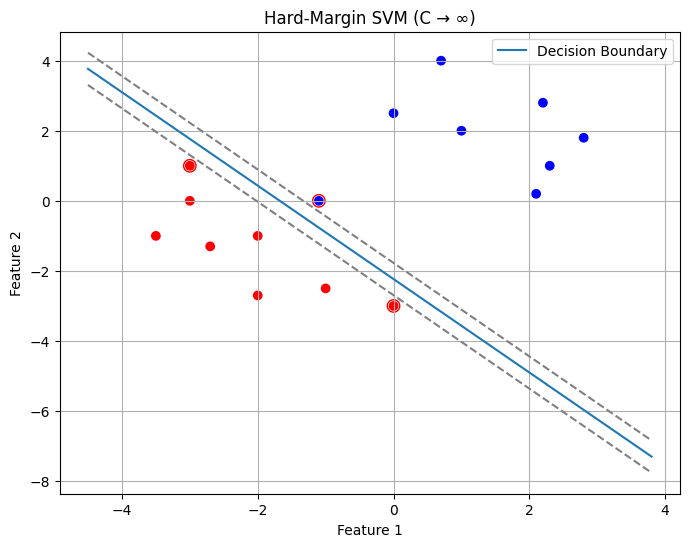

In [31]:
def hard_margin_sklearn(X, y):

    # Train the hard-margin SVM model with a large C value (approximation)
    C_hard = 1e10
    model = SVC(kernel='linear', C=C_hard)
    model.fit(X, y)

    # Extract W and b from the SVM model
    W_optimal = model.coef_[0]
    b_optimal = model.intercept_[0]
    print("Optimal W:", W_optimal)
    print("Optimal b:", b_optimal)

    # Support vectors
    support_vectors = model.support_vectors_
    print("Support Vectors:\n", support_vectors)
    print("Number of support vectors:", len(support_vectors))

    # Decision boundary
    slope = -W_optimal[0] / W_optimal[1]
    intercept = -b_optimal / W_optimal[1]

    x_vals = np.linspace(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1, 100)
    y_vals = slope * x_vals + intercept

    # Margin distance
    margin = 1 / np.linalg.norm(W_optimal)
    y_up = y_vals + margin
    y_down = y_vals - margin

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

    # Highlight support vectors
    plt.plot(x_vals, y_vals, label='Decision Boundary')
    plt.plot(x_vals, y_up, linestyle='--', color='grey')
    plt.plot(x_vals, y_down, linestyle='--', color='grey')

    plt.scatter(support_vectors[:,0], support_vectors[:,1],
                s=80, facecolors='none', edgecolors='r')

    plt.title('Hard-Margin SVM (C → ∞)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.savefig("/content/sk_hard_margin_svm.png", dpi=300, bbox_inches='tight')
    plt.show()

hard_margin_sklearn(X,y)

With scikit-learn, both soft-margin and hard-margin SVMs are implemented through the same SVC(kernel='linear') function, and the behaviour is fully controlled by the value of C. Small C values in the soft-margin SVM allow violations and produce a wide margin with many support vectors, while very large C values approximate a hard-margin SVM, giving a narrow margin and enforcing almost perfect separation.

Compared to the CVXPY implementation, scikit-learn abstracts away the underlying optimisation and removes the need to work directly with dual variables or constraint formulations. Instead, it provides W, b, and support vectors directly from the existing trained model. Therefore, scikit-learn is much easier to use, but also less transparent, since the user can't see the dual variables or explicitly set up the quadratic programming problem.

In terms of the comparison between the original implementation and the scikit-learn implementation, the actual results were essentially the same. For every C value, the decision boundaries and support vectors from scikit-learn matched the CVXPY values from the original implementation. Small C values still gave wide margins, and large C values pushed the model towards the same hard-margin boundary that the manual solver produced. The hard-margin version with a very large C also gave the same separating line and the same support vectors as the true hard-margin solution.

